In [0]:
!pip install tensorflow==2.0.0-alpha0
import tensorflow as tf
print(tf.__version__)
import tensorflow.keras.utils as utils
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import numpy as np

     |████████████████████████████████| 79.9MB 1.3MB/s 
     |████████████████████████████████| 3.0MB 42.1MB/s 
     |████████████████████████████████| 419kB 35.9MB/s 
  Found existing installation: tensorflow 1.15.0rc3
    Uninstalling tensorflow-1.15.0rc3:
      Successfully uninstalled tensorflow-1.15.0rc3
2.0.0-alpha0


In [0]:
#6만개의 훈련데이터와 1만개의 테스트데이터를 구글에서 가져온다
width = 28
height = 28
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train=x_train.reshape(60000, width*height).astype('float32')/255.0  # 28*28 정사각형 데이터를 1줄짜리 데이터로 바꾼다
x_test = x_test.reshape(10000, width*height).astype('float32')/255.0  # 정규화하기 위해 255로 나눈다

In [0]:
#6만개의 데이터 중
#5만개의 데이터를 훈련용 데이터로 쓰고
#1만개를 검증용 데이터로 쓴다
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]


In [0]:
#정답을 카테고리화 한다
y_train = utils.to_categorical(y_train)
y_val = utils.to_categorical(y_val)
y_test = utils.to_categorical(y_test)

In [0]:
#입력은 28*28개의 픽셀데이터 
#출력은 0~9까지 10개
#딥러닝 레이어
model = Sequential()
#--------96.5퍼센트 함수---------------
#model.add(Dense(units=100, input_dim=width*height, activation='elu'))
#model.add(Dense(units=10, activation='softmax'))
#model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
#---------------------------------------
model.add(Dense(units=1024, input_dim=width*height, activation='elu'))
model.add(Dense(units=512, activation='elu'))
model.add(Dense(units=512, activation='elu'))
model.add(Dense(units=256, activation='elu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(patience=3) # 조기종료 콜백함수 정의
hist = model.fit(x_train, y_train, epochs=50, batch_size=60, verbose=1, validation_data=(x_val, y_val), callbacks=[early_stopping])


Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 25s 495us/sample - loss: 0.2018 - accuracy: 0.9380 - val_loss: 0.1744 - val_accuracy: 0.9464
Epoch 2/50
50000/50000 [==============================] - 25s 495us/sample - loss: 0.1459 - accuracy: 0.9555 - val_loss: 0.1212 - val_accuracy: 0.9665
Epoch 3/50
50000/50000 [==============================] - 25s 494us/sample - loss: 0.1160 - accuracy: 0.9642 - val_loss: 0.1438 - val_accuracy: 0.9611
Epoch 4/50
50000/50000 [==============================] - 24s 484us/sample - loss: 0.0972 - accuracy: 0.9698 - val_loss: 0.1157 - val_accuracy: 0.9679
Epoch 5/50
50000/50000 [==============================] - 25s 491us/sample - loss: 0.0829 - accuracy: 0.9743 - val_loss: 0.1045 - val_accuracy: 0.9743
Epoch 6/50
50000/50000 [==============================] - 24s 489us/sample - loss: 0.0773 - accuracy: 0.9771 - val_loss: 0.1119 - val_accuracy: 0.9710
Epoch 7/50
50000/50000 [====================

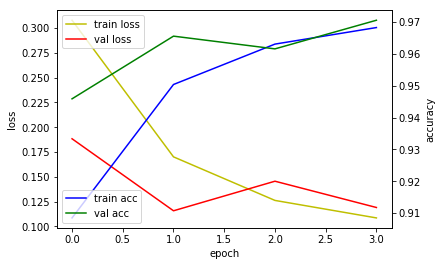

In [0]:
# 5. 모델 학습 과정 표시하기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [0]:
#test data
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=30)

print('')
print('loss : '+str(loss_and_metrics[0]))
print('accuray : '+str(loss_and_metrics[1]))


10000/10000 [==============================] - 2s 170us/sample - loss: 0.1314 - accuracy: 0.9666

loss : 0.13144586099449315
accuray : 0.9666


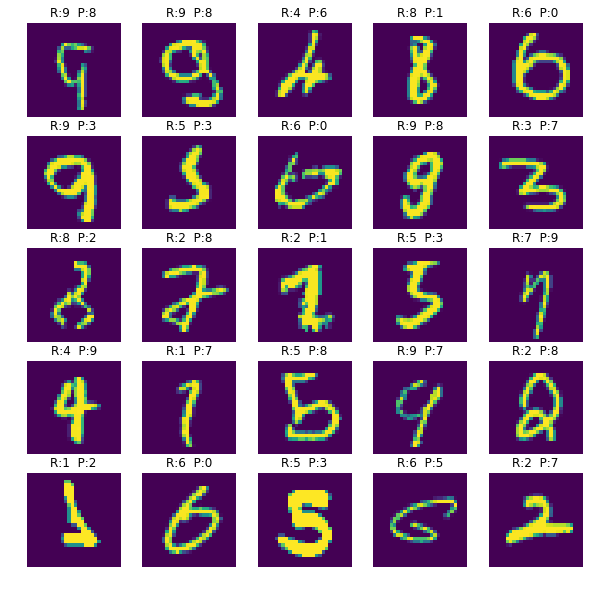

In [0]:
#7. 모델 사용하기
# 맞추지 못한 데이터를 출력한다
yhat_test = model.predict(x_test, batch_size = 32)

%matplotlib inline
import matplotlib.pyplot as plt

plt_row=5
plt_col=5

plt.rcParams["figure.figsize"]=(10,10)

f, axarr = plt.subplots(plt_row, plt_col)

cnt = 0
i=0

while cnt<(plt_row*plt_col):
  if np.argmax(y_test[i]) == np.argmax(yhat_test[i]):
    i+=1
    continue
  sub_plt = axarr[int(cnt/plt_row), int(cnt%plt_col)]
  sub_plt.axis('off')
  sub_plt.imshow(x_test[i].reshape(width, height))
  sub_plt_title='R:'+str(np.argmax(y_test[i]))+'  P:'+str(np.argmax(yhat_test[i]))
  sub_plt.set_title(sub_plt_title)
  i+=1
  cnt+=1
plt.show()